## LangGraph
### 🧩 What is LangGraph?
LangGraph is an extension of LangChain, built to help define and execute stateful, multi-step workflows using graph-based logic. In LangGraph, instead of chaining prompts or tools linearly, you define a graph — a set of nodes and edges — to represent how tasks flow and connect.

### 🔗 What is a Graph in LangGraph?
A graph here refers to a directed graph (or DAG — Directed Acyclic Graph) where:
- Nodes = individual steps (functions, chains, LLM calls, tools)
- Edges = logical transitions between nodes, often based on the result of a step

Think of it like a flowchart, where:

- Each box is a task or model interaction.

- Each arrow shows what step to take next, sometimes based on conditions (e.g., if a model’s response is “yes”, go this way; otherwise, go that way).



```
User Input
    ↓
Intent Classification (Node)
    ↓
 ┌───────────────┬─────────────┐
 │               │             │
Billing Query  Tech Support   General Info
   ↓              ↓              ↓
LLM Call A     LLM Call B     LLM Call C

```
Each LLM call is a node. Based on the intent, the graph routes to the correct step.

### 🧠 Why Use Graphs?
1. Conditional branching: Do different things based on previous results.

2. State tracking: Keep context through the graph, useful in multi-turn tasks.

3. Reusability & clarity: You can visualize and maintain workflows better.

4. Error handling: Add fallback nodes if a step fails.

In [ ]:
!pip install -q -U pydantic langchain langgraph langchain-core langchain-community

### Key components in LangGraph
In LangGraph, the key components help define how your workflow is structured, how data flows, and how decisions are made during execution. Here's a table of the main components and their roles:

| **Component**   | **Description**                               | **LangGraph Example**                  |
|----------------|-----------------------------------------------|----------------------------------------|
| **Node**        | A step or function                            | `LLM call`, `retriever`, `tool`        |
| **Edge**        | Connection from one node to another           | `start → classify → respond`           |
| **Entry Point** | Where the graph starts                        | `graph.set_entry_point("start")`       |
| **Exit Point**  | Where it ends (or returns result)             | Last node or terminal output           |
| **Conditional** | Decides path based on logic or state          | `if intent == "billing" → billing`     |


In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
  graph_info:str

- `State` is a dictionary with a specific structure: it must have a `graph_info` key, and its value must be a string.

- `TypedDict` helps with type safety and auto-complete in editors.

Below are the nodes (start_play, soccer, basketball):

Each node...

- Receives the current state
- Updates the graph_info string a bit
- Returns a new state dictionary

In [ ]:
def start_play(state:State):
  print("Start play node has been called.")
  return {"graph_info":state["graph_info"] + "I am planning to play"}

def soccer(state:State):
  print("Soccer node has been called.")
  return {"graph_info":state["graph_info"] + " Soccer"}

def basketball(state:State):
  print("Basketball node has been called.")
  return {"graph_info":state["graph_info"] + " Basketball"}

In [ ]:
import random
from typing import Literal  # used to decide in which direction to go

def random_play(state:State)-> Literal["soccer", "basketball"]:
  if random.random()>0.5:
    return "soccer"
  else:
    return "basketball"

- `random_play` Randomly picks "soccer" or "basketball".

- `Literal` tells the type checker that this function will only return exactly "soccer" or "basketball" — nothing else.

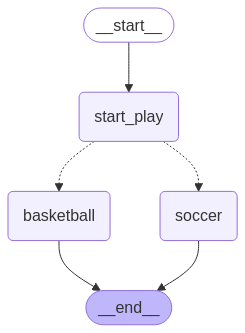

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# build graph
graph = StateGraph(State)

# all nodes
graph.add_node("start_play", start_play)
graph.add_node("soccer", soccer)
graph.add_node("basketball", basketball)

# schedule the flow graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("soccer", END)
graph.add_edge("basketball", END)

# compile graph
graph_builder = graph.compile()

# view
display(Image(graph_builder.get_graph().draw_mermaid_png()))

It is time to execute the graph we have been building...

In [ ]:
graph_builder.invoke({"graph_info": "I am Milad. "})

Start play node has been called.
Soccer node has been called.


{'graph_info': 'I am Milad. I am planning to play Soccer'}